In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')


In [4]:
# Display the first few rows of the dataset
print(matches_df.head())

# Display basic information about the dataset
print(matches_df.info())

# Display summary statistics
print(matches_df.describe())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [6]:
# Display the first few rows of the dataset
print(deliveries_df.head())

# Display basic information about the dataset
print(deliveries_df.info())

# Display summary statistics
print(deliveries_df.describe())


   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

In [8]:
# Check for missing values
print(matches_df.isnull().sum())


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [10]:
# Distribution of categorical columns
print(matches_df['team1'].value_counts())
print(matches_df['team2'].value_counts())

# Unique values in columns
print(matches_df['city'].unique())
print(matches_df['date'].unique())


team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64
team2
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant       

In [12]:
# Distribution of categorical columns
print(deliveries_df['bowler'].value_counts())
print(deliveries_df['batsman'].value_counts())

# Unique values in columns
print(deliveries_df['match_id'].unique())
print(deliveries_df['inning'].unique())


bowler
Harbhajan Singh     3451
A Mishra            3172
PP Chawla           3157
R Ashwin            3016
SL Malinga          2974
                    ... 
Y Gnaneswara Rao       6
P Prasanth             6
SPD Smith              2
SN Khan                2
AC Gilchrist           1
Name: count, Length: 405, dtype: int64
batsman
V Kohli          4211
SK Raina         4044
RG Sharma        3816
S Dhawan         3776
G Gambhir        3524
                 ... 
K Ahmed             1
U Kaul              1
DP Vijaykumar       1
P Raj               1
LH Ferguson         1
Name: count, Length: 516, dtype: int64
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64 

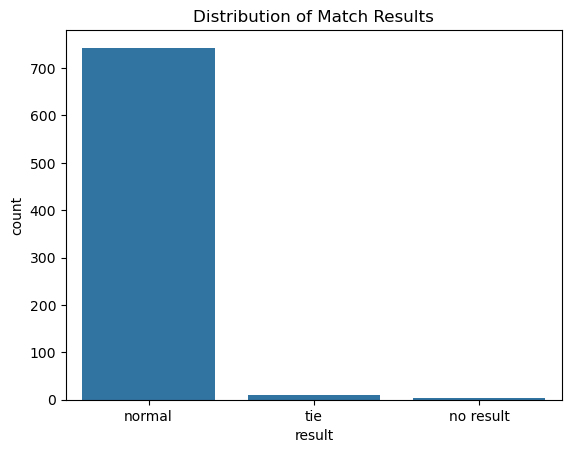

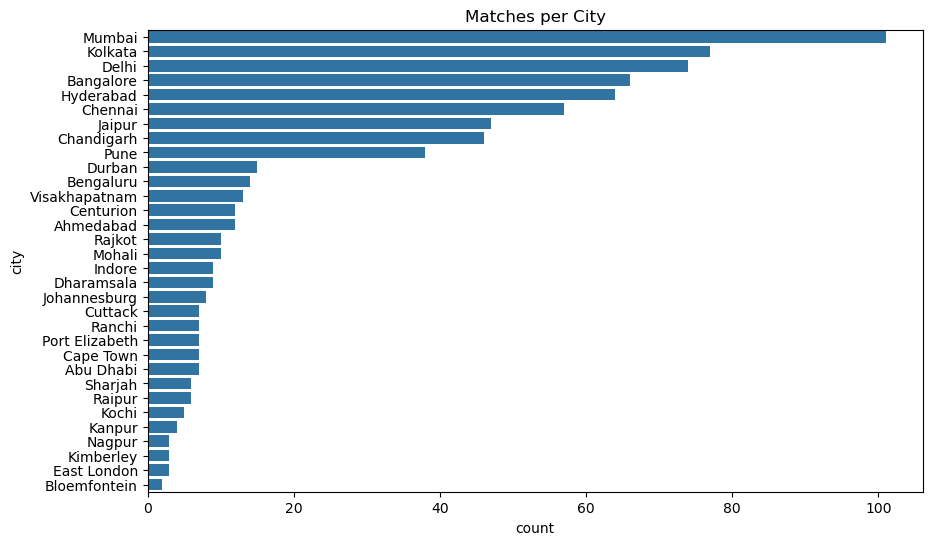

In [16]:
# Distribution of match results
sns.countplot(x='result', data=matches_df)
plt.title('Distribution of Match Results')
plt.show()

# Matches per city
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=matches_df, order=matches_df['city'].value_counts().index)
plt.title('Matches per City')
plt.show()

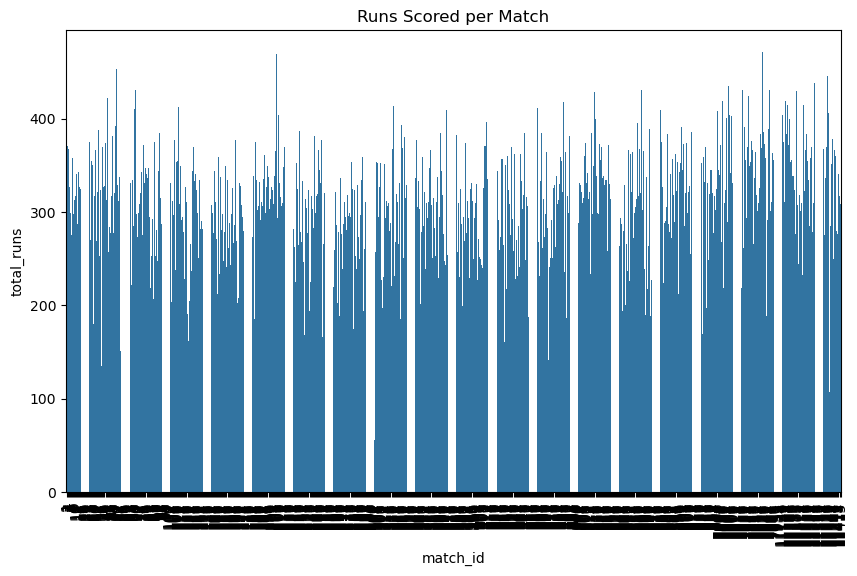

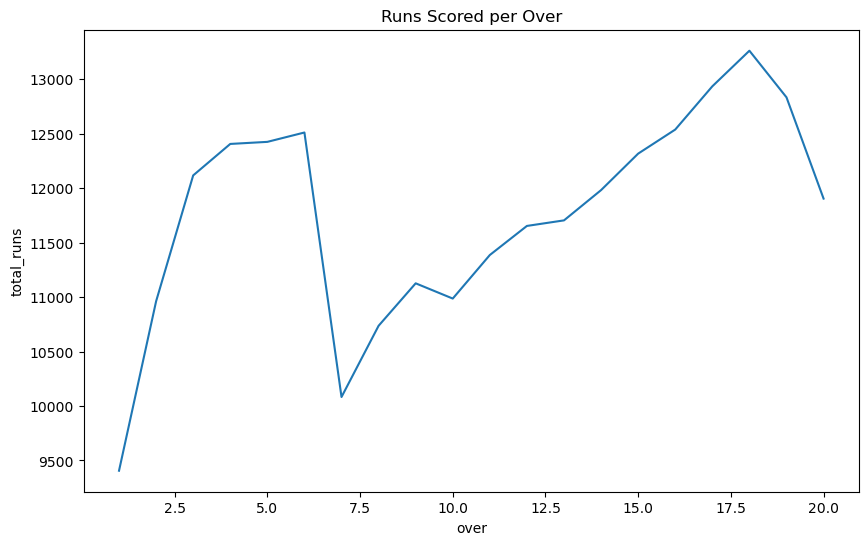

In [18]:
# Runs scored per match
runs_per_match = deliveries_df.groupby('match_id')['total_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='match_id', y='total_runs', data=runs_per_match)
plt.title('Runs Scored per Match')
plt.xticks(rotation=90)
plt.show()

# Runs per over
deliveries_df['over'] = deliveries_df['over'].astype(float)
runs_per_over = deliveries_df.groupby('over')['total_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='over', y='total_runs', data=runs_per_over)
plt.title('Runs Scored per Over')
plt.show()
